In [1]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd


import hashlib
import json
from os import listdir
from os.path import isfile, join
import pandas as pd

%matplotlib inline

In [2]:
os.getcwd()

'/root/SNU_fastMRI/Code'

In [3]:
!find .. -name '*.json'

../result/SJ/newUnet_48_3_0/jsons/.ipynb_checkpoints/newUnet01-checkpoint.json
../result/SJ/newUnet_48_3_0/jsons/newUnet01.json
../result/JB/newUnet_16_7_0.1/jsons/.ipynb_checkpoints/newUnet_test03-checkpoint.json
../result/JB/newUnet_16_7_0.1/jsons/newUnet_test03.json
../result/JB/newUnet/jsons/.ipynb_checkpoints/newUnet_test02-checkpoint.json
../result/JB/newUnet/jsons/newUnet_test02.json


In [4]:
global dataset, exp, dir_path

jsons = ['../result/SJ/newUnet_48_3_0/jsons/newUnet01.json']
model='newUnet'

In [5]:
import os.path
from datetime import datetime

for file in jsons:
    print(file)
    print(datetime.fromtimestamp(os.path.getctime(file)).strftime('%Y.%m.%d %H:%M:%S'))
#     print("Last modified: %s" % time.ctime(os.path.getmtime(dir_path+'/'+file)))
#     print("Created: %s" % time.ctime(os.path.getctime(dir_path+'/'+file)))
    print()

../result/SJ/newUnet_48_3_0/jsons/newUnet01.json
2022.08.04 07:30:05



In [6]:
## ===== loading json file as pandas data frame ===== ##
def load_exp_result(filename):
    list_result = []
    with open(filename, 'r') as infile:
        results = json.load(infile)
        list_result.append(results)
    df = pd.DataFrame(list_result) # .drop(columns=[])
    return df


## ===== plotting loss and accuracy graph together ===== ## 
def plot_loss_acc(df,**kwargs):
    train_losses = df['train_losses']
    train_losses = list(train_losses[0])

    val_losses = df['val_losses']
    val_losses = list(val_losses[0])
    
    
    ## === making dataframe for loss === ##
    loss_data = []
    
    for epoch,train_loss in enumerate(train_losses,0):
        loss_data.append({'type':'train','loss':train_loss,'epoch':epoch})

    
    for epoch,val_loss in enumerate(val_losses,0):
        loss_data.append({'type':'val','loss':val_loss,'epoch':epoch})
    
    df_loss = pd.DataFrame(loss_data)
    ## ================================== ##
    
#     ## === making dataframe for acc === ##
#     acc_data = []
    
#     for epoch,train_acc in enumerate(train_accs,0):
#         acc_data.append({'type':'train','acc':train_acc,'epoch':epoch})
    
#     for epoch,val_acc in enumerate(val_accs,0):
#         acc_data.append({'type':'val','acc':val_acc,'epoch':epoch})
        
#     df_acc = pd.DataFrame(acc_data)
    ## ================================== ##
    
    ## === plotting == ##
    plt.rcParams["figure.figsize"] = (10,6)
    plt.subplots_adjust(wspace=0.5)

    sns.lineplot(x=df_loss['epoch'], y=df_loss['loss'],hue=df_loss['type'])
#     sns.lineplot(x=df_acc['epoch'], y=df_acc['acc'],hue=df_acc['type'],ax=axes[1])
    
#     model = df['model'][0]
#     acc_val = df['val_accs'][0]['age'][-1]
    try:
        acc_test = df['test_acc'][0]['age'][-1]
    except:
        pass
#     optim = df['optim'][0]
    
    title_string = f"Exp name : {df.exp_name[0]}"
    plt.suptitle(title_string,y=1.2)

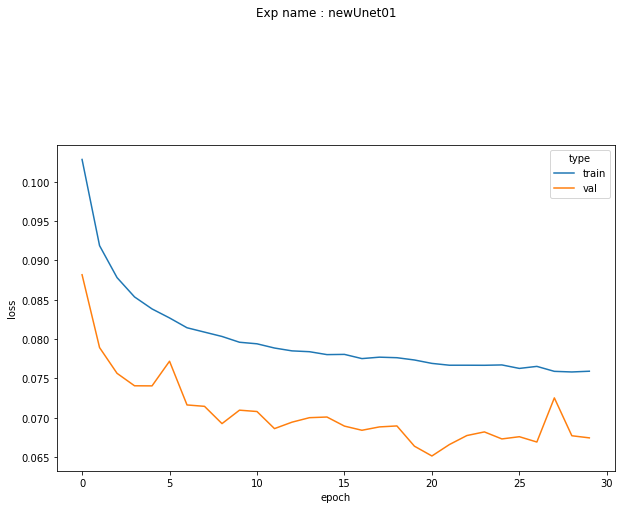

In [7]:
# file_list = glob.glob(f'{dir_path}/{exp}')
# print(file_list)
file_list = jsons
for file in file_list:
#     file_path = dir_path+'/'+file
#     df = load_exp_result(file_path)
    df = load_exp_result(file)
    dl = plot_loss_acc(df)

In [8]:
df.train_losses[0][-10:],df.val_losses[0][-10:]

([0.07692046503887723,
  0.07668750954172945,
  0.07668771542245154,
  0.0766792750400134,
  0.07672481919840082,
  0.07628128792452868,
  0.07653968587898635,
  0.07590932720488675,
  0.07583063708129177,
  0.07592389060257942],
 [0.06515175969393774,
  0.06660350933816742,
  0.0677499897356136,
  0.06821055029036655,
  0.0673184624107608,
  0.06760027137553745,
  0.0669248609868948,
  0.0725358277447444,
  0.06772240719575984,
  0.06745312264565125])

In [9]:
# file_list = glob.glob(f'{dir_path}/{exp}')
# print(file_list)
file_list = jsons
for file in file_list:
    file_path = dir_path+'/'+file
    df = load_exp_result(file_path)
    dl = plot_loss_acc(df)

NameError: name 'dir_path' is not defined

In [124]:
df.columns

Index(['train_losses', 'train_accs', 'val_losses', 'val_accs', 'train_acc',
       'val_acc', 'test_acc', 'model', 'val_size', 'test_size', 'resize',
       'train_batch_size', 'val_batch_size', 'in_channels', 'optim', 'lr',
       'weight_decay', 'exp_name', 'cat_target', 'num_target',
       'confusion_matrix', 'gpus', 'sbatch'],
      dtype='object')

In [145]:
print(f"{df['test_acc'][0].}")

{'age': [0.05385145723537843]}
